<a href="https://colab.research.google.com/github/ikanx101/G-Colab/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [337]:
# set libraries
rm(list=ls())
library(dplyr)
library(keras)
library(tensorflow)
library(caret)

In [338]:
# import data
data = read.csv("https://raw.githubusercontent.com/ikanx101/Live-Session-Nutrifood-R/master/Kaggle%20Data/Diabetes/raw%20data/diabetes.csv")
colnames(data) = tolower(colnames(data))

In [339]:
cor(data)

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
pregnancies,1.00000000,0.12945867,0.14128198,-0.08167177,-0.07353461,0.01768309,-0.03352267,0.54434123,0.22189815
glucose,0.12945867,1.00000000,0.15258959,0.05732789,0.33135711,0.22107107,0.13733730,0.26351432,0.46658140
bloodpressure,0.14128198,0.15258959,1.00000000,0.20737054,0.08893338,0.28180529,0.04126495,0.23952795,0.06506836
skinthickness,-0.08167177,0.05732789,0.20737054,1.00000000,0.43678257,0.39257320,0.18392757,-0.11397026,0.07475223
insulin,-0.07353461,0.33135711,0.08893338,0.43678257,1.00000000,0.19785906,0.18507093,-0.04216295,0.13054795
bmi,0.01768309,0.22107107,0.28180529,0.39257320,0.19785906,1.00000000,0.14064695,0.03624187,0.29269466
diabetespedigreefunction,-0.03352267,0.13733730,0.04126495,0.18392757,0.18507093,0.14064695,1.00000000,0.03356131,0.17384407
age,0.54434123,0.26351432,0.23952795,-0.11397026,-0.04216295,0.03624187,0.03356131,1.00000000,0.23835598
outcome,0.22189815,0.46658140,0.06506836,0.07475223,0.13054795,0.29269466,0.17384407,0.23835598,1.00000000


In [340]:
save_dulu = data$outcome
data =
  data %>%
  select(-bloodpressure,-skinthickness,-outcome,-insulin)

preProcess_range_model = preProcess(data, method='range')
data = predict(preProcess_range_model, newdata = data) #variabel targetnya hilang di sini
data$outcome = save_dulu

head(data)
table(data$outcome)

,pregnancies,glucose,bmi,diabetespedigreefunction,age,outcome
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.35294118,0.7437186,0.5007452,0.23441503,0.4833333,1
2,0.05882353,0.4271357,0.3964232,0.11656704,0.1666667,0
3,0.47058824,0.9195980,0.3472429,0.25362938,0.1833333,1
4,0.05882353,0.4472362,0.4187779,0.03800171,0.0000000,0
5,0.00000000,0.6884422,0.6423249,0.94363792,0.2000000,1
6,0.29411765,0.5829146,0.3815201,0.05251921,0.1500000,0



  0   1 
500 268 

In [341]:
# kita pisah pecah dua
data_0 = 
  data %>% 
  filter(outcome == 0)
data_1 = 
  data %>% 
  filter(outcome == 1)

# set minimal n for train data
set.seed(10104074)
n = 155

id_0 = sample(nrow(data_0),n,replace = F)
data_0_1 = data_0[id_0,]
data_0_2 = data_0[-id_0,]

id_1 = sample(nrow(data_1),n,replace = F)
data_1_1 = data_1[id_1,]
data_1_2 = data_1[-id_1,]

# set train and test
train_df = rbind(data_0_1,data_1_1)
test_df = rbind(data_0_2,data_1_2)

# let's see
# train
train_label_raw = train_df$outcome
train_label_clean = to_categorical(train_label_raw)
train_matrix = as.matrix(train_df[-ncol(train_df)])

# test
test_label_raw = test_df$outcome
test_label_clean = to_categorical(test_label_raw)
test_matrix = as.matrix(test_df[-ncol(train_df)])

In [342]:
model = keras_model_sequential()
model %>%
  layer_dense(units = 400,activation = 'relu',
              input_shape = c(ncol(train_matrix))) %>%
  layer_dense(units = 200, activation = 'sigmoid') %>%
  layer_dense(units = 100, activation = 'relu') %>%
  layer_dense(units = 25, activation = 'relu') %>%
  layer_dense(units = 2, activation = 'sigmoid')

summary(model)

model %>% compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=c('accuracy')
)

Model: "sequential_38"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_198 (Dense)                   (None, 400)                     2400        
________________________________________________________________________________
dense_197 (Dense)                   (None, 200)                     80200       
________________________________________________________________________________
dense_196 (Dense)                   (None, 100)                     20100       
________________________________________________________________________________
dense_195 (Dense)                   (None, 25)                      2525        
________________________________________________________________________________
dense_194 (Dense)                   (None, 2)                       52          
Total params: 105,277
Trainable params: 105,277
Non-trainable params: 0
______________

In [343]:
fitModel =
  model %>%
  fit(train_matrix,
      train_label_clean,
      epochs = 300,
      batch_size = 75,
      validation_split = 0.35)

`geom_smooth()` using formula 'y ~ x'



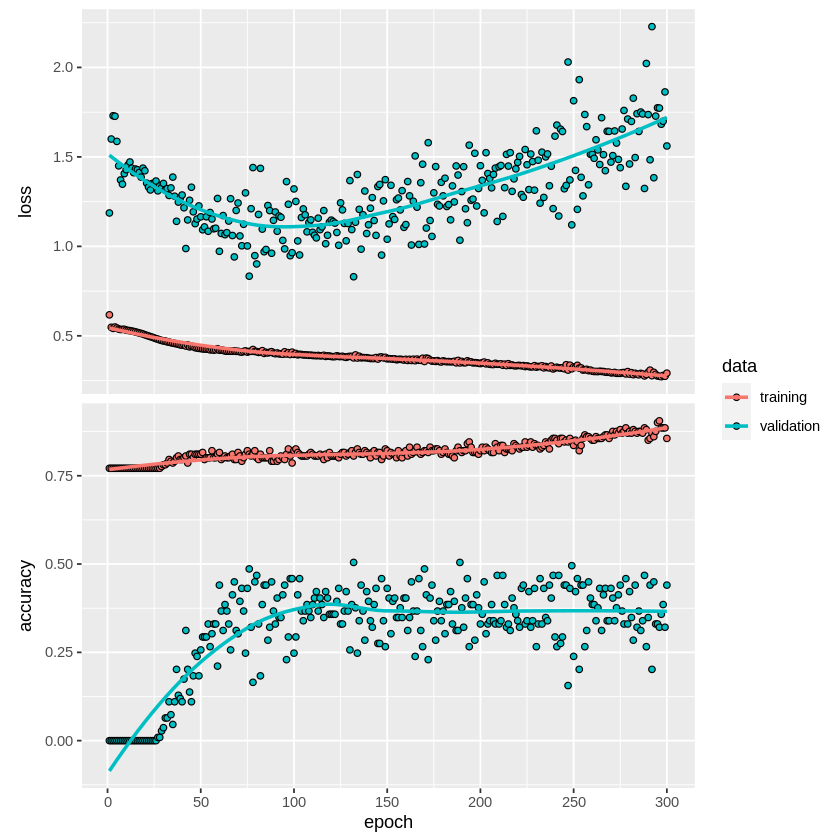

In [344]:
plot(fitModel)

In [345]:
# Pakai train
pred_train = model %>% predict_classes(train_matrix)
table(pred_train,train_label_raw)
mean(train_label_raw == pred_train)

# Pakai test
pred_test = model %>% predict_classes(test_matrix)
table(pred_test,test_label_raw)
mean(test_label_raw == pred_test)

          train_label_raw
pred_train   0   1
         0 148  73
         1   7  82

[1] 0.7419355

         test_label_raw
pred_test   0   1
        0 310  47
        1  35  66

[1] 0.8209607